In [129]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [131]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [132]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [133]:
print(useful_columns_zcosmos_data)

['z', 'Imag']


In [134]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [135]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

In [136]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [137]:
useful_columns_cosmos_range = list(range(4, 14)) + [15]
useful_columns_cosmos_data = [cosmos_names[i] for i in useful_columns_cosmos_range]
print(useful_columns_cosmos_data)

['imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'zphot']


In [138]:
zphot = useful_columns_cosmos_data[10]
cosmos_redshift = cosmos[zphot]
print(cosmos_redshift)

[ 1.34  0.76  0.4  ...,  0.07  0.67  1.26]


In [139]:
print(len(zcosmos))
print(len(cosmos))

10644
438226


In [140]:
zcosmos_df = pd.DataFrame(fits_data[1].data)
zcosmos_df.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


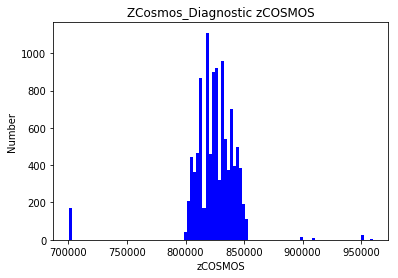

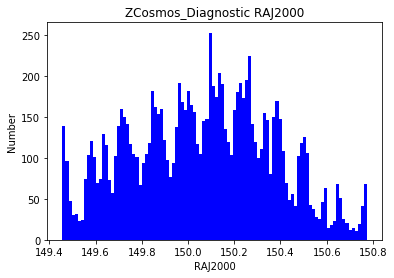

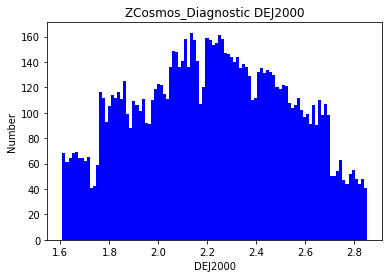

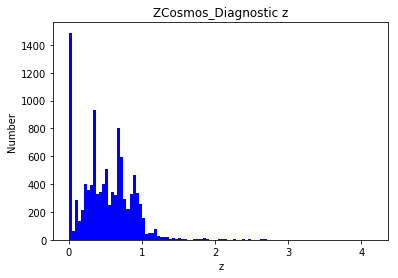

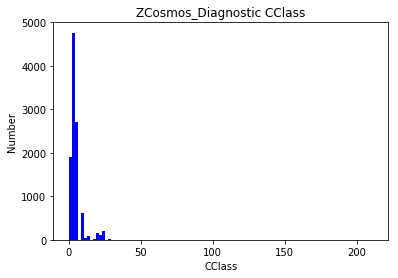

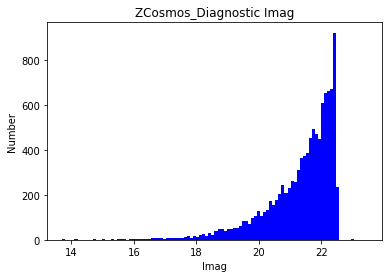

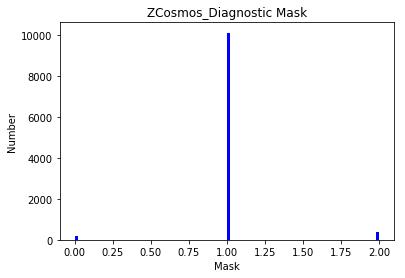

In [141]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos_df:
    plt.hist(zcosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [142]:
##remove abnormal placeholder values
zcosmos_df_part2 = zcosmos_df.query('z<999')
zcosmos_df_filtered = zcosmos_df_part2.query('z>0.000')
zcosmos_df_filtered.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


In [143]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


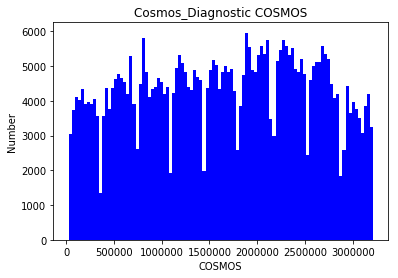

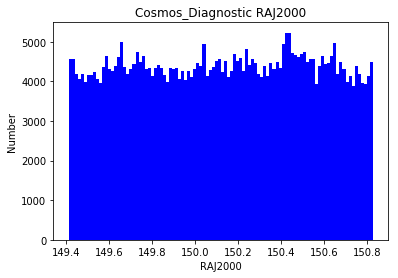

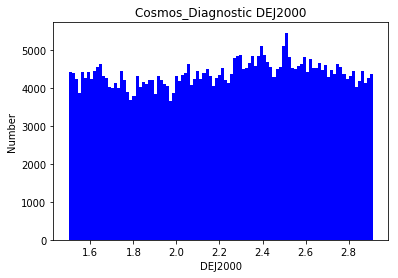

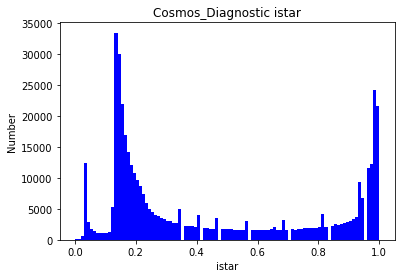

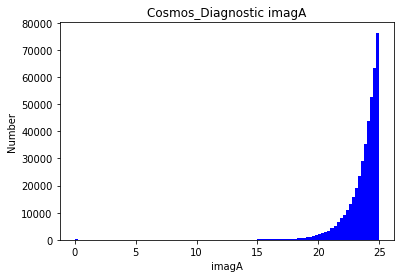

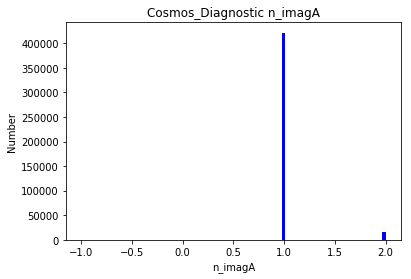

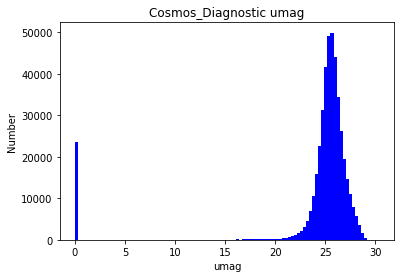

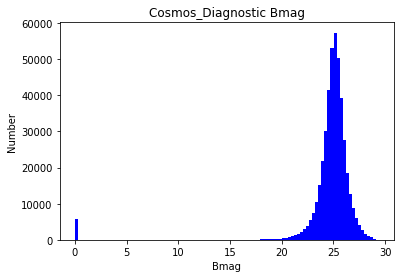

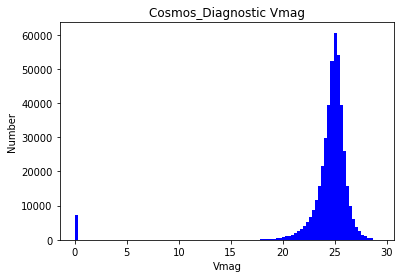

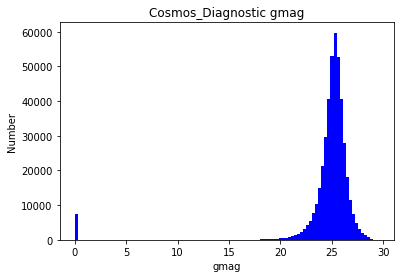

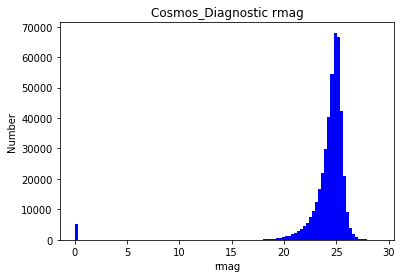

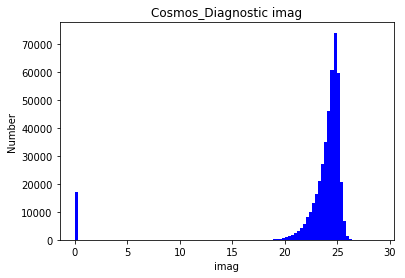

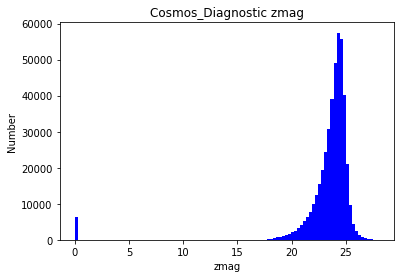

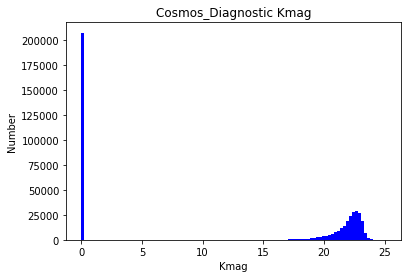

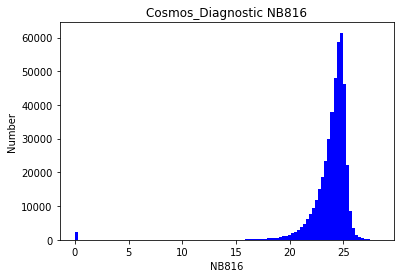

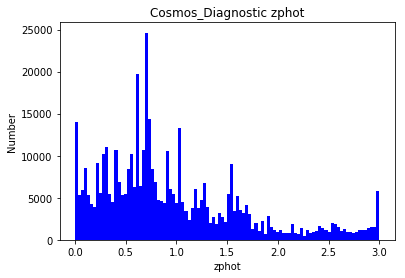

In [144]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [145]:
#removal of abnormal placeholder values
cosmos_df_filtered[(cosmos_df.umag > 0.00) 
                   & (cosmos_df.Bmag > 0.00) 
                   & (cosmos_df.Vmag > 0.00) 
                   & (cosmos_df.gmag > 0.00) 
                   & (cosmos_df.rmag > 0.00) 
                   & (cosmos_df.zmag > 0.00) 
                   & (cosmos_df.Vmag > 0.00) 
                   & (cosmos_df.gmag > 0.00) 
                   & (cosmos_df.rmag > 0.00) 
                   & (cosmos_df.imag > 0.00) 
                   & (cosmos_df.zmag > 0.00) 
                   & (cosmos_df.Kmag > 0.00) 
                   & (cosmos_df.zphot > 0.00)]
cosmos_df_filtered.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34
5,26437,150.73287,1.62514,0.52,20.5785,2,21.0047,20.6726,20.5957,20.6621,20.8121,0.0000,20.4596,20.4376,20.5521,0.01


In [146]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match1 = pd.read_csv('cross_match.csv')

In [147]:
print(cosmos_and_zcosmos_cross_match1.columns)

Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')


In [148]:
import numpy as np
np.any(np.isnan(cosmos_and_zcosmos_cross_match1['Bmag']))


True

In [161]:
#removal of abnormal placeholder values
cosmos_and_zcosmos_cross_match1[(cosmos_and_zcosmos_cross_match1.Bmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.Imag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.imagA > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.z > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.zphot > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.zmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.Vmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.gmag > 0.00) 
                                & (cosmos_and_zcosmos_cross_match1.rmag > 0.00)
                                & (cosmos_and_zcosmos_cross_match1.istar > 0.00)]

,angDist,_RAJ2000,_DEJ2000,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,Bmag,...,zphot,_RAJ2000.1,_DEJ2000.1,zCOSMOS,RAJ2000.1,DEJ2000.1,z,CClass,Imag,Mask
0,0.072302,150.21992,2.27797,1603755,150.21992,2.27797,0.17,21.8588,1,23.2285,...,0.61,150.219940,2.277972,824273,150.219940,2.277972,0.7288,1.1,22.21,1
2,0.113585,150.20375,2.27275,1603935,150.20375,2.27275,0.21,22.1439,1,25.8226,...,0.84,150.203781,2.272744,824368,150.203781,2.272744,0.8795,3.5,22.09,1
3,0.046088,150.11016,2.27258,1603958,150.11016,2.27258,0.59,21.0134,1,23.1575,...,0.46,150.110168,2.272570,824795,150.110168,2.272570,0.4922,3.5,20.95,1
4,3.310317,150.10933,2.27219,1604021,150.10933,2.27219,0.98,24.8869,1,25.9311,...,0.70,150.110168,2.272570,824795,150.110168,2.272570,0.4922,3.5,20.95,1
9,0.083979,150.13958,2.27073,1604303,150.13958,2.27073,0.89,20.4569,1,22.1714,...,0.43,150.139603,2.270726,824672,150.139603,2.270726,0.4410,4.5,20.42,1
10,0.055028,150.15596,2.26988,1604538,150.15596,2.26988,0.22,21.6291,1,22.8113,...,0.19,150.155975,2.269883,824583,150.155975,2.269883,0.2085,4.5,21.70,1
12,0.126364,150.12144,2.26730,1604544,150.12144,2.26730,0.51,21.4270,1,22.5625,...,1.01,150.121475,2.267303,824743,150.121475,2.267303,0.8270,4.5,21.35,1
16,0.093596,150.09232,2.26948,1604701,150.09232,2.26948,0.37,21.7974,1,23.5119,...,0.67,150.092346,2.269481,824882,150.092346,2.269481,0.6857,4.5,21.76,1
17,2.468821,150.09166,2.26946,1604703,150.09166,2.26946,0.98,24.7523,1,25.7680,...,0.52,150.092346,2.269481,824882,150.092346,2.269481,0.6857,4.5,21.76,1
18,4.167810,150.06219,2.26763,1604825,150.06219,2.26763,0.13,23.1826,1,24.9839,...,0.56,150.062149,2.268787,825030,150.062149,2.268787,1.0720,1.5,22.24,1


In [162]:
cosmos_and_zcosmos_cross_match1_useful_columns = ['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000', 
                                                  'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
                                                  'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask']

In [163]:
print(cosmos_and_zcosmos_cross_match1.columns)

Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


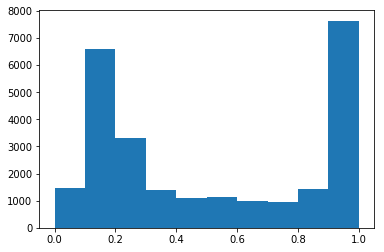

In [164]:
# plt.scatter(cosmos_and_zcosmos_cross_match1['imagA'], cosmos_and_zcosmos_cross_match1['istar'])
plt.hist(cosmos_and_zcosmos_cross_match1['istar'], range=(0., 1.))
plt.show()

In [165]:
sum(cosmos_and_zcosmos_cross_match1['istar'])#[type(cosmos_and_zcosmos_cross_match1['istar'])!=float])

nan

What to try next:
1. check for NaNs - find NaN - numpy.isnan - numpy.where - print(___[istar]___[row])

angDist


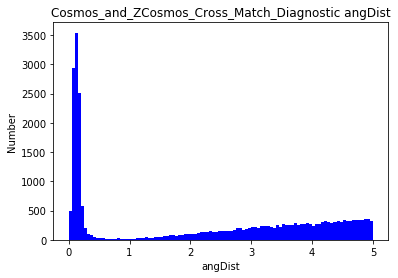

_RAJ2000


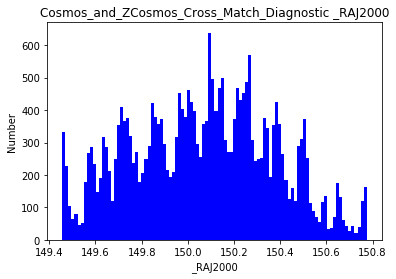

_DEJ2000


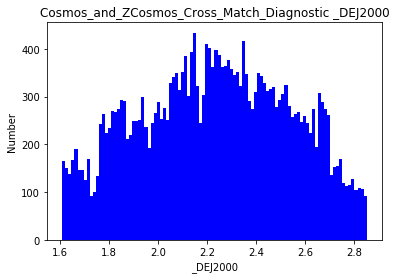

COSMOS


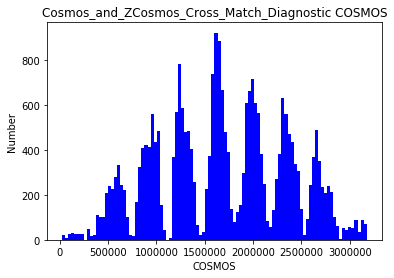

RAJ2000


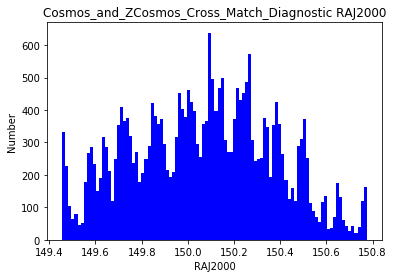

DEJ2000


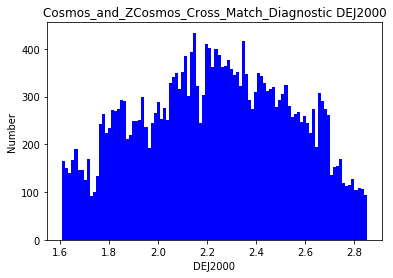

imagA


ValueError: max must be larger than min in range parameter.

In [166]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_and_zcosmos_cross_match1_useful_columns:
    print(i)
    plt.hist(cosmos_and_zcosmos_cross_match1[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [ ]:
cosmos_and_zcosmos_cross_match1.istar.max()

min_istar = cosmos_and_zcosmos_cross_match1.istar.min()
max_istar = cosmos_and_zcosmos_cross_match1.istar.max()
np.histogram(cosmos_and_zcosmos_cross_match1.istar, range = (min_istar, max_istar))

In [ ]:
##Find duplicates in cosmos_and_zcosmos_cross_match
total = 0
for i in cosmos_and_zcosmos_cross_match1:
    for line in cosmos_and_zcosmos_cross_match1:
        finded = line.find(i)
        if finded != -1 and finded != 0:
            total += 1
            if total > 1: 
                print(i)
##The only duplicates it shows me are ones I knew would be there (columns), so it seems there is nothing more for me to do about this. 

In [ ]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match1[cosmos_and_zcosmos_cross_match_useful_columns]

In [ ]:
##Get only the points in cosmos that arent also in zcosmos.
cosmos_only = cosmos_df_filtered[~cosmos_df_filtered['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
print(len(cosmos_only))

In [ ]:
##Get only the points in zcosmos that arent also in cosmos.
zcosmos_only = zcosmos_df_filtered[~zcosmos_df_filtered['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]
print(len(zcosmos_only))

In [ ]:
cosmos_only.columns

In [ ]:
##Comparing the magnitudes/redshifts of galaxies in both cosmos and zcosmos and galaxies just in cosmos
for i in cosmos_only.columns:
    if i in cosmos_and_zcosmos_cross_match.columns:
        print(i)
        plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, alpha=.2, normed = True)
        plt.hist(cosmos_only[i], color='green', linewidth=5, alpha=.2, normed = True)
        plt.xlabel(i)
        plt.ylabel("Number")
        plt.title("Galaxies In Comos Only" + " " + "Versus" + " " + "Galaxies In Cosmos AND Zcosmos" + " " + i)
        plt.savefig("Galaxies In Comos Only" + " " + "Versus" + "Galaxies In Cosmos AND Zcosmos" + " " + i + " " + "Plot.png")
        plt.show()

For imagA: 
- roughly equal percentage of galaxies iwth imag 15-18
- 